#Imports

In [ ]:
import tensorflow
from tensorflow import keras

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Dataset

In [ ]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_test, identificacoes_test))=dataset.load_data()

#Explorando os dados

In [ ]:
len(imagens_treino)
imagens_treino.shape


(60000, 28, 28)

In [ ]:
imagens_test.shape

(10000, 28, 28)

In [ ]:
len(identificacoes_treino)

60000

In [ ]:
len(identificacoes_test)

10000

In [ ]:
identificacoes_treino.min()
identificacoes_treino.max()



9

# Visualizando os dados

In [ ]:

total_de_classificacoes = 10
nomes_de_classificacoes= ['Camiseta','Calça', 'Pullover',' Vestido','Casaco','Sandália','Saia','Tenis','Bolsa','Bota']

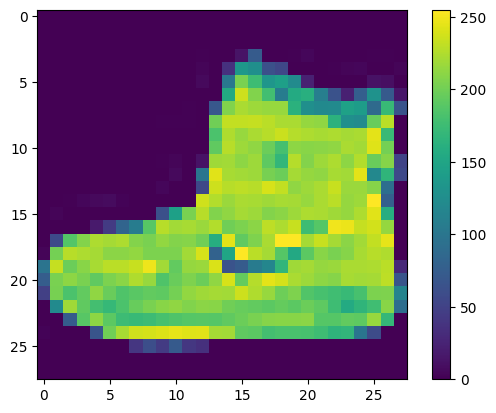

In [ ]:
'''plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])
for imagem in range(10):
  plt.subplot(2,5,imagem+1)
  plt.imshow(imagens_treino [imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])'''

plt.imshow(imagens_treino[0])
plt.colorbar()

# Criando o nosso modelo

In [ ]:
#Modelo duas camadas ou multicamada
#Modelo = keras.Sequential([keras.layers.Flatten(input_shape =(28,28)), keras.layers.Dense(256,activation = tensorflow.nn.relu), keras.layers.Dense(10, activation=tensorflow.nn.softmax)])
#Modelo.compile(optimizer= 'adam',loss='sparse_categorical_crossentropy')
#Modelo.fit(imagens_treino,identificacoes_treino)

In [ ]:
# from scipy import ndimage - biblioteca para lidar com imagens e ajustar para preparar o dataset


## Otimizando o modelo

In [ ]:
imagens_treino = imagens_treino/float(255) # Normalização dos dados

##Criação, compilação, treinamento e normalização do modelo

In [ ]:

Modelo = keras.Sequential([keras.layers.Flatten(input_shape =(28,28)),
                           keras.layers.Dense(256,activation = tensorflow.nn.relu),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(10, activation=tensorflow.nn.softmax)])
adam = keras.optimizers.Adam(lr=0.002)
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss'), keras.callbacks.ModelCheckpoint(filepath='Melhormodelo.hdf5',monitor='val_loss',save_best_only=True)]
Modelo.compile(optimizer= adam,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico = Modelo.fit(imagens_treino,identificacoes_treino, batch_size = 500, epochs = 10, validation_split=0.2, callbacks = callbacks)


Epoch 1/10
96/96 [==============================] - 4s 31ms/step - loss: 0.7322 - accuracy: 0.7474 - val_loss: 0.4966 - val_accuracy: 0.8298
Epoch 2/10
 8/96 [=>............................] - ETA: 1s - loss: 0.5021 - accuracy: 0.8250

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 2s 17ms/step - loss: 0.4794 - accuracy: 0.8341 - val_loss: 0.4434 - val_accuracy: 0.8423
Epoch 3/10
96/96 [==============================] - 2s 16ms/step - loss: 0.4255 - accuracy: 0.8523 - val_loss: 0.4020 - val_accuracy: 0.8573
Epoch 4/10
96/96 [==============================] - 2s 23ms/step - loss: 0.3964 - accuracy: 0.8607 - val_loss: 0.3814 - val_accuracy: 0.8659
Epoch 5/10
96/96 [==============================] - 2s 19ms/step - loss: 0.3699 - accuracy: 0.8699 - val_loss: 0.3641 - val_accuracy: 0.8706
Epoch 6/10
96/96 [==============================] - 2s 18ms/step - loss: 0.3525 - accuracy: 0.8740 - val_loss: 0.3682 - val_accuracy: 0.8689


## Entendendo o modelo

In [ ]:
Sumario_modelo = Modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
Pesos_camada_dense = Modelo.layers[1].get_weights()[0]

In [ ]:
Pesos_camada_dense.shape

(784, 256)

In [ ]:
#pesos_camada_dense_zerado = np.zeros((784, 256))
#Modelo.layers[1].set_weights([pesos_camada_dense_zerado,Vieses_camada_dense])
#Zerar garante a simetria dos dados o que não é bom para o treinamento.

In [ ]:
#pesos_camada_dense_aleatorio = np.random.rand(784, 256)
#Modelo.layers[1].set_weights([pesos_camada_dense_aleatorio, Vieses_camada_dense])
#Valores aleatorios pode ter valor muito fora e não é ideal


In [ ]:
Modelo.layers[1].get_weights()

[array([[-0.05438245, -0.00841517,  0.00152568, ..., -0.01415631,
          0.00325735,  0.04445187],
        [-0.05139117, -0.10443459,  0.00214391, ...,  0.06753777,
          0.08130372,  0.02367079],
        [-0.1048638 ,  0.00640154, -0.04201626, ..., -0.05601018,
          0.09322802, -0.0441025 ],
        ...,
        [-0.01541063,  0.09100796,  0.00941003, ...,  0.04159097,
          0.09781422,  0.08674166],
        [-0.01102837, -0.05820109, -0.05255435, ...,  0.02054017,
          0.04279783,  0.00159183],
        [ 0.00729467,  0.0054379 ,  0.01401492, ...,  0.04498946,
          0.00426722, -0.02418842]], dtype=float32),
 array([-0.0189014 ,  0.13029946, -0.01467214,  0.1099031 , -0.00749104,
        -0.01425566, -0.10543275,  0.10655225, -0.10147015,  0.01547799,
         0.04713303,  0.1418428 , -0.02350614, -0.01631836,  0.025244  ,
         0.10562034,  0.08350363, -0.04421399, -0.04501231,  0.04623799,
        -0.0959061 ,  0.08185151,  0.14832643,  0.00233464,  0.008

In [ ]:
Modelo.get_config()

{'name': 'sequential',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 28, 28)}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Ze

In [ ]:
Modelo.compile(optimizer= 'adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico = Modelo.fit(imagens_treino,identificacoes_treino, epochs = 5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 12s 7ms/step - loss: 0.4083 - accuracy: 0.8530 - val_loss: 0.3712 - val_accuracy: 0.8706
Epoch 2/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3672 - accuracy: 0.8666 - val_loss: 0.3847 - val_accuracy: 0.8593
Epoch 3/5
1500/1500 [==============================] - 20s 13ms/step - loss: 0.3450 - accuracy: 0.8733 - val_loss: 0.3479 - val_accuracy: 0.8743
Epoch 4/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3264 - accuracy: 0.8788 - val_loss: 0.3444 - val_accuracy: 0.8730
Epoch 5/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3116 - accuracy: 0.8857 - val_loss: 0.3423 - val_accuracy: 0.8789


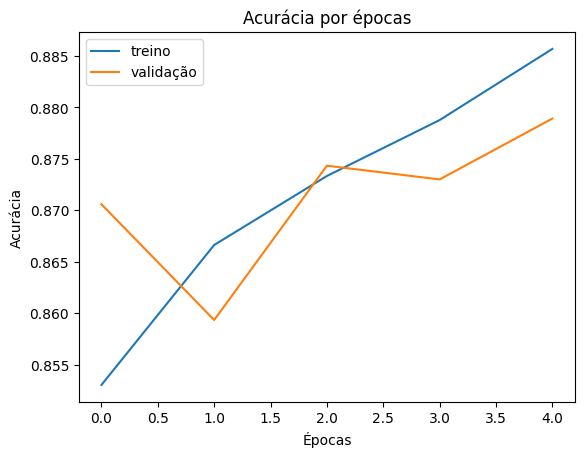

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['treino','validação'])

In [ ]:
Vieses_camada_dense = Modelo.layers[1].get_weights()[1]

In [ ]:
#vieses_camada_dense_zerado = np.zeros(256)
#Modelo.layers[1].set_weights([Pesos_camada_dense, vieses_camada_dense_zerado])
#Zerar os vieses é menos grave do que os Pesos, o Keras inicia com vieses zerados.

##Salvando o modelo treinado

In [ ]:

from tensorflow.keras.models import load_model

Modelo.save('modelo.h5')
Modelo_salvo = load_model('modelo.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Plotando os dados de acurácia e perda por época

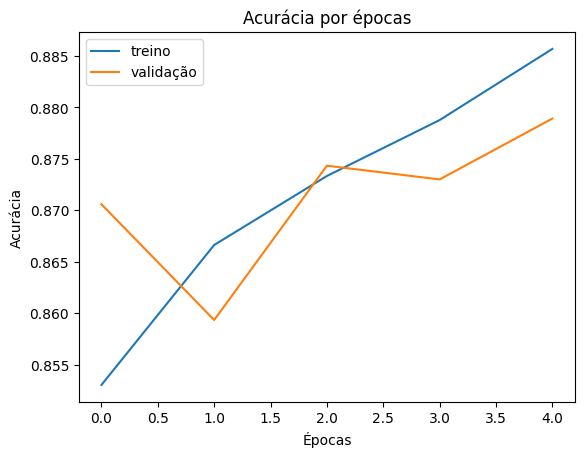

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['treino','validação'])


In [ ]:
#Adicionar camadas ocultas não necessariamente melhoram o modelo
#Modelo = keras.Sequential([keras.layers.Flatten(input_shape =(28,28)), keras.layers.Dense(256,activation = tensorflow.nn.relu),keras.layers.Dense(24, activation=tensorflow.nn.relu), keras.layers.Dense(10, activation=tensorflow.nn.softmax)])
#Modelo.compile(optimizer= 'adam',loss='sparse_categorical_crossentropy')
#Modelo.fit(imagens_treino,identificacoes_treino)

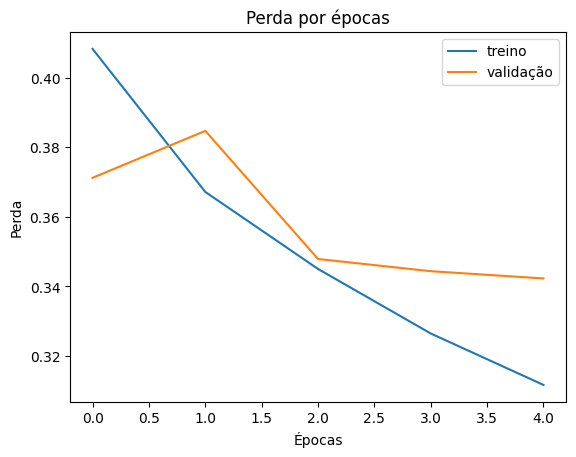

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['treino','validação'])

#Testando o modelo

In [ ]:
testes= Modelo.predict(imagens_test)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste', identificacoes_test[1])


313/313 [==============================] - 1s 3ms/step
resultado teste: 2
número da imagem de teste 2


In [ ]:
#Avaliação
perda_teste, acuracia_teste = Modelo.evaluate(imagens_test,identificacoes_test)
print('Perda do teste:', perda_teste, 'Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 3ms/step - loss: 58.0872 - accuracy: 0.8625
Perda do teste: 58.08722686767578 Acurácia do teste: 0.862500011920929


In [ ]:
testes_modelo_salvo = Modelo_salvo.predict(imagens_test)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_test[1])

313/313 [==============================] - 1s 3ms/step
resultado teste modelo salvo: 2
número da imagem de teste: 2


#Avaliando o modelo

In [ ]:
perda_teste, acuracia_teste = Modelo_salvo.evaluate(imagens_test, identificacoes_test)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 3ms/step - loss: 58.0872 - accuracy: 0.8625
Perda do teste: 58.08722686767578
Acurácia do teste: 0.862500011920929
